# DATA PRE-PROCESSING AND EXPLORATION

In [59]:
# importing required libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [60]:
# takes a path to a CSV file and reads the data and naming the dataframe  
noise = pd.read_csv('dataset/noise_data_test.csv')

In [61]:
# displays the first ten rows of the dataframe by default
noise.head(10)

,Unnamed: 0,timestamp,max_slow,type,model
0,0,1/03/2022 0:03,70.800003,B738,Boeing 737-800
1,1,1/03/2022 0:05,69.199997,B738,Boeing 737-800
2,2,1/03/2022 0:06,69.599998,B738,Boeing 737-800
3,3,1/03/2022 0:09,71.500000,B738,Boeing 737-800
4,4,1/03/2022 0:11,70.800003,B738,Boeing 737-800
5,5,1/03/2022 0:22,71.099998,B738,Boeing 737-800
6,6,1/03/2022 0:44,71.400002,B738,Boeing 737-800
7,7,1/03/2022 0:46,73.500000,B77W,Boeing 777-300ER
8,8,1/03/2022 0:57,69.300003,B738,Boeing 737-800
9,9,1/03/2022 1:07,62.700001,E35L,Embraer Legacy 600


In [62]:
# prints information about the DataFrame
noise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6673 entries, 0 to 6672
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6673 non-null   int64  
 1   timestamp   6673 non-null   object 
 2   max_slow    6673 non-null   float64
 3   type        6673 non-null   object 
 4   model       6673 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 260.8+ KB


In [63]:
# shows number of rows and column
noise.shape

(6673, 5)

In [64]:
# returns description of the data in the DataFrame
noise.describe()

In [65]:
# returns the number of missing values in the dataset.
noise.isnull().sum()

Unnamed: 0    0
timestamp     0
max_slow      0
type          0
model         0
dtype: int64

In [66]:
# timestamp value is assigned on date column.
noise["Date"] = pd.to_datetime (noise["timestamp"])

In [67]:
noise.head()

,Unnamed: 0,timestamp,max_slow,type,model,Date
0,0,1/03/2022 0:03,70.800003,B738,Boeing 737-800,2022-01-03 00:03:00
1,1,1/03/2022 0:05,69.199997,B738,Boeing 737-800,2022-01-03 00:05:00
2,2,1/03/2022 0:06,69.599998,B738,Boeing 737-800,2022-01-03 00:06:00
3,3,1/03/2022 0:09,71.500000,B738,Boeing 737-800,2022-01-03 00:09:00
4,4,1/03/2022 0:11,70.800003,B738,Boeing 737-800,2022-01-03 00:11:00


In [68]:
# Now since the column "Unnamed"  and "timestamp" is of no use, so we remove those columns.

In [69]:
noise=noise.drop(['Unnamed: 0','timestamp'], axis=1)
noise.head()

,max_slow,type,model,Date
0,70.800003,B738,Boeing 737-800,2022-01-03 00:03:00
1,69.199997,B738,Boeing 737-800,2022-01-03 00:05:00
2,69.599998,B738,Boeing 737-800,2022-01-03 00:06:00
3,71.500000,B738,Boeing 737-800,2022-01-03 00:09:00
4,70.800003,B738,Boeing 737-800,2022-01-03 00:11:00


In [70]:
# showing remaining number of rows and columns
noise.shape

(6673, 4)

In [71]:
# checking distribution of the target variable (max_slow)

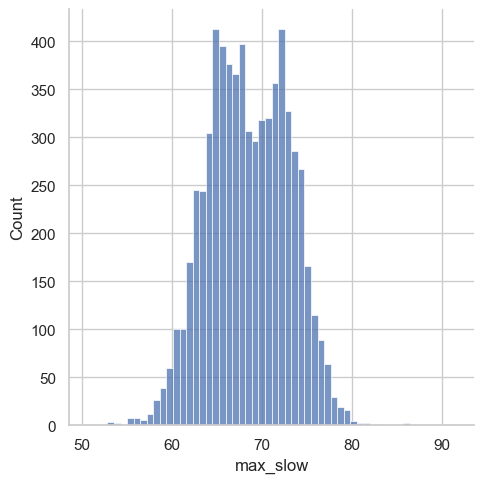

In [72]:
sns.displot(noise, x= "max_slow")

# Visualisation without using algorithm

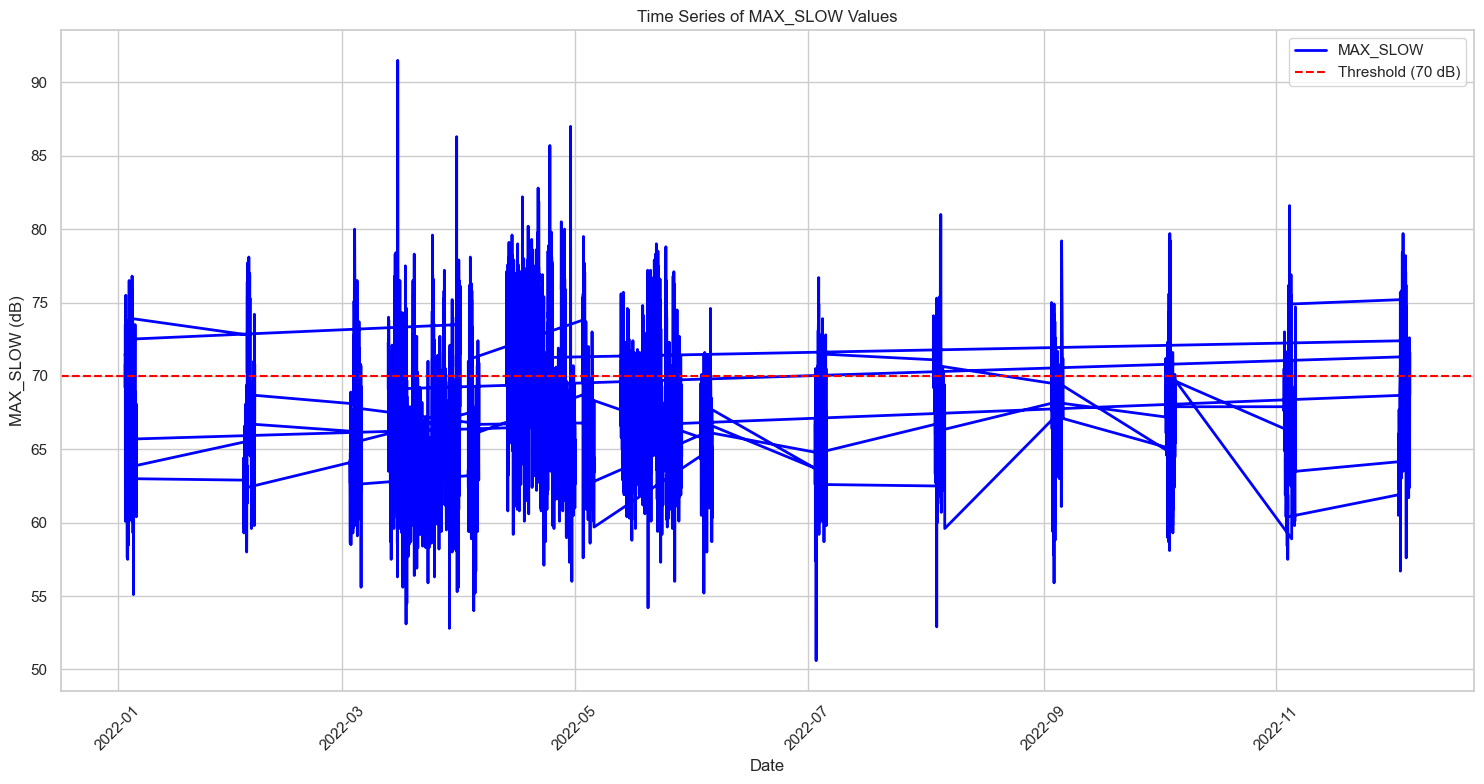

In [73]:
# TIME SERIES GRAPH of MAX_SLOW(dB)

import matplotlib.pyplot as plt

# Noise dataFrame contains the aircraft data

fig, ax = plt.subplots(figsize=(15, 8))
dates = noise['Date']
max_slow_values = noise['max_slow']

ax.plot(dates, max_slow_values, color='blue', linewidth=2, label='MAX_SLOW')
ax.set_title('Time Series of MAX_SLOW Values')
ax.set_xlabel('Date')
ax.set_ylabel('MAX_SLOW (dB)')
ax.axhline(y=70, color='red', linestyle='--', label='Threshold (70 dB)')

ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


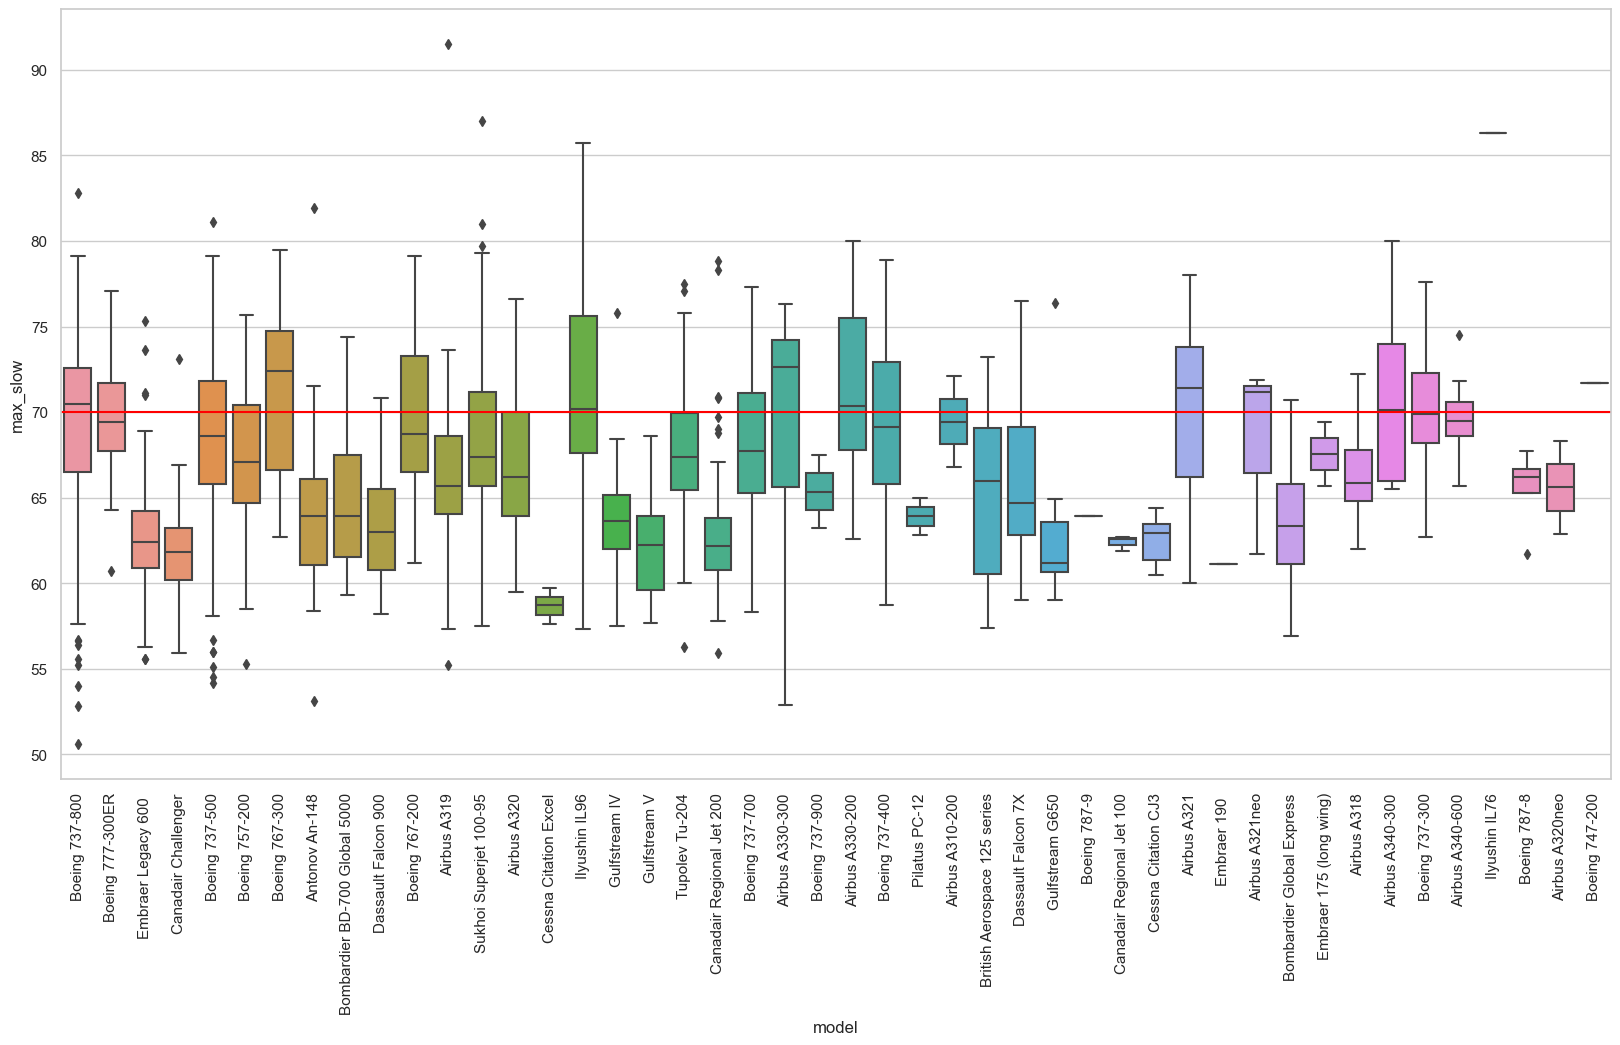

In [74]:
# Box Plot by Aircraft Model
plt.figure(figsize=(20, 10))
sns.boxplot(data=noise,y='max_slow',x='model')
plt.xticks(rotation=90)

plt.axhline(y=70, color='red');

In [75]:
# length of aircraft model

len(noise['model'].unique())

46

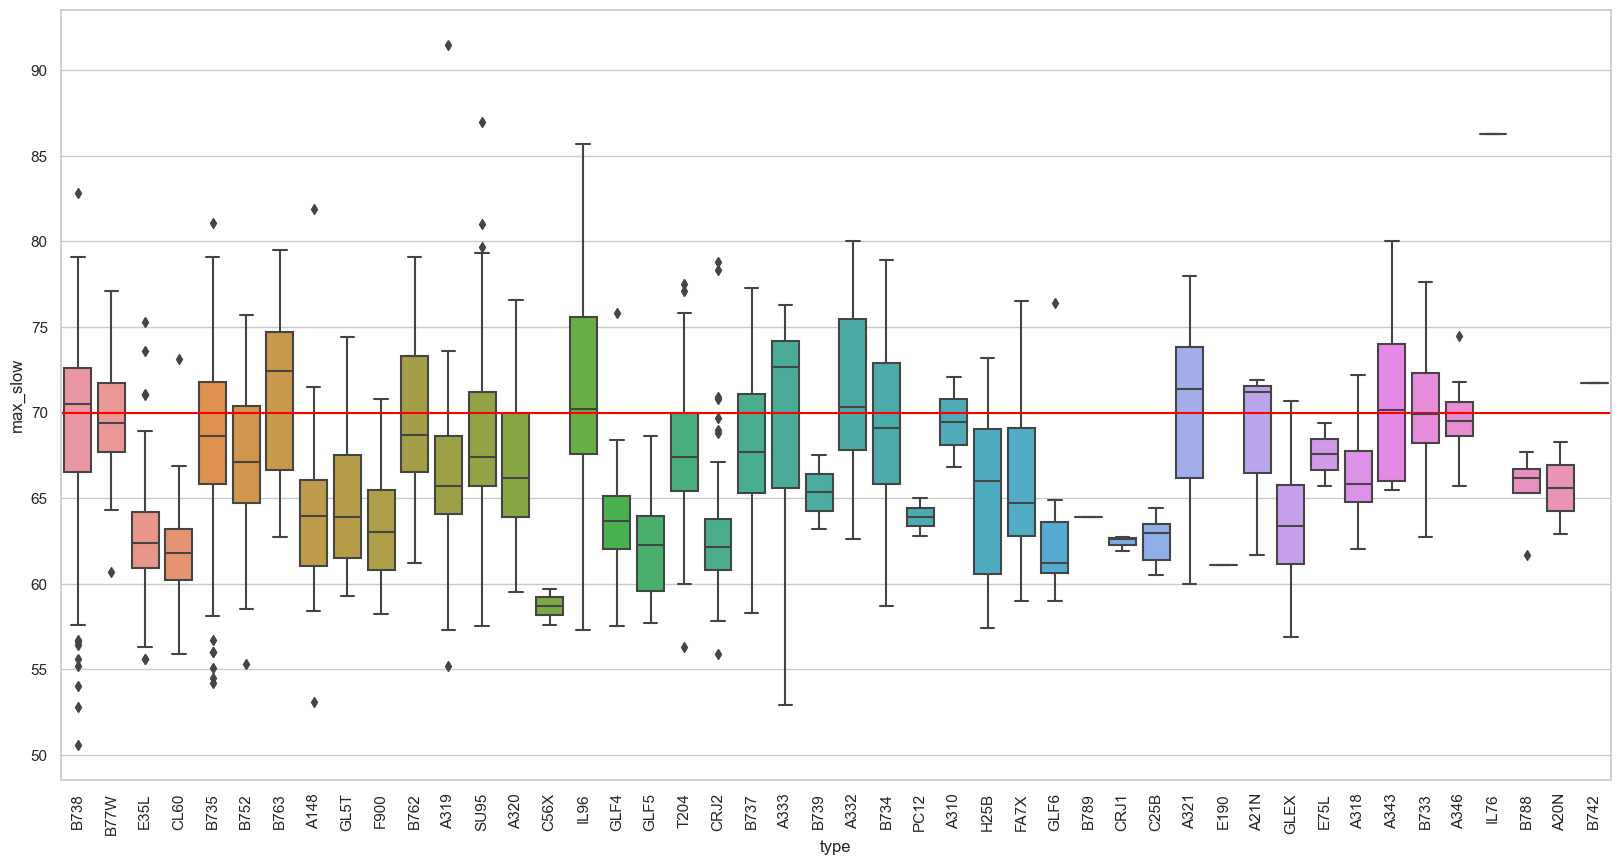

In [76]:
# Box Plot by Aircraft Type
plt.figure(figsize=(20, 10))
sns.boxplot(data=noise,y='max_slow',x='type')
plt.xticks(rotation=90)

plt.axhline(y=70, color='red');

In [77]:
# length of aircraft type

len(noise['type'].unique())

46

# MODEL SELECTION AND TRAINING

In [78]:
# Since the attributes are not in numeric form, so we use Label Encoder to convert strings into numeric values

In [79]:
noise.head()

,max_slow,type,model,Date
0,70.800003,B738,Boeing 737-800,2022-01-03 00:03:00
1,69.199997,B738,Boeing 737-800,2022-01-03 00:05:00
2,69.599998,B738,Boeing 737-800,2022-01-03 00:06:00
3,71.500000,B738,Boeing 737-800,2022-01-03 00:09:00
4,70.800003,B738,Boeing 737-800,2022-01-03 00:11:00


In [80]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

noise['type'] = label_encoder.fit_transform(noise['type'])
noise['model'] = label_encoder.fit_transform(noise['model'])
noise['unix_timestamp'] = pd.to_datetime(noise['Date']).astype(np.int64)/ 10**9
noise.drop(['Date'], axis=1, inplace=True)

X = noise.drop('max_slow', axis = 1)
y = noise['max_slow']

#showing the values after converting from categorical value to numerical value.
noise.head()

,max_slow,type,model,unix_timestamp
0,70.800003,16,16,1.641168e+09
1,69.199997,16,16,1.641168e+09
2,69.599998,16,16,1.641168e+09
3,71.500000,16,16,1.641169e+09
4,70.800003,16,16,1.641169e+09


In [81]:
from sklearn.model_selection import train_test_split
# Split the data into 90% training and 10% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=36)

# Gradient Boosting Algorithm

In [82]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

# Model Evaluation of Gradient Boosting

In [83]:
from sklearn.metrics import mean_squared_error, r2_score
# Predicting on the validation set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

r2 = r2_score(y_test, y_pred)
print (f"Mean Squared Error : {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error : 6.067815495420748
Root Mean Squared Error: 2.463293627528141
R-squared: 0.700842688541536


MSE = 6.0866 and RMSE= 2.4473 means the predictions made by the model have an error of 2.4473 units when compared to the actual
target values in our noise dataset problem. Similarly, R-square= 0.701 means that 71% of the variance in the dependent 
variable (target) can be explained by the independent variables in our model.

Model Evaluation of Training and Testing Dataset

Training MSE: 4.840818604051269
Testing MSE: 6.067815495420748


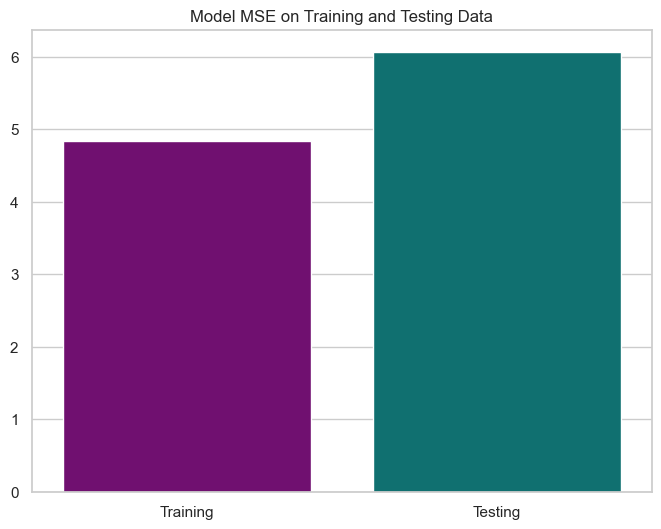

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Model and data are already defined above (X_train, y_train, X_test, y_test) before this point

# Gettng the model's predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE) on training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing MSE values
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Creating a grouped bar chart using seaborn
data = {'Dataset': ['Training', 'Testing'],
        'MSE': [train_mse, test_mse]}
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Dataset', y='MSE', data=data, palette=['purple', 'teal'])
plt.title('Model MSE on Training and Testing Data')
plt.ylim(0)  # Set y-axis lower limit to 0
plt.show()


In our mode, we have obtained the following MSE values: Training MSE: 4.63655823491841 Testing MSE: 5.7913990496039505

INTERPRETATION:

The training MSE (4.63655823491841) is lower than the testing MSE (5.7913990496039505), which is generally expected. It suggests that the model is able to fit the training data quite well, and its predictions on the training set have lower error compared to predictions on unseen data (testing set).

The difference between the training and testing MSE is not too large, which is a good sign. It indicates that the model is not significantly overfitting to the training data.

# Dataset Analysis 1

#  Comparison between different algorithm with Gradient Boosting Algorithm

# Fitting a single decision tree

In [85]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(X_train, y_train)

#generating predictions for the decision tree regressor
y_pred_dt = dt_reg.predict(X_test)

In [86]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
mse_dt = np.round(mean_squared_error(y_test, y_pred_dt), 2)
mse_dt

11.75

In [87]:
# calculatingroot mean square error
from sklearn.metrics import mean_squared_error
rmse_dt = mse_dt**0.5
rmse_dt

3.427827300200522

In [88]:
# calculating r2 score
from sklearn.metrics import r2_score
r2_score_dt = np.round(r2_score(y_test,y_pred_dt),3)
r2_score_dt

0.421

# Fitting a random forest

In [89]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg = rf_reg.fit(X_train, y_train)

#generating predictions for the random forest regressor
y_pred_rf = dt_reg.predict(X_test)

In [90]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
mse_rf = np.round(mean_squared_error(y_test, y_pred_rf), 2)
mse_rf

11.75

In [91]:
# calculating root mean square error
rmse_rf = mse_rf**0.5
rmse_rf

3.427827300200522

In [92]:
# calculating r2 score
from sklearn.metrics import r2_score
r2_score_rf = np.round(r2_score(y_test,y_pred_rf),3)
r2_score_rf

0.421

# Fitting Gradient Boosted Tree

In [93]:
#defining number of tress, learning_rate and max_depth
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=3)
gb_reg = gb_reg.fit(X_train, y_train)

#generating predictions for the gardient boosting regressor
y_pred_gb = gb_reg.predict(X_test)

In [94]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
mse_gb = np.round(mean_squared_error(y_test, y_pred_gb), 2)
mse_gb

6.06

In [95]:
# calculating root mean square error
rmse_gb = mse_gb**0.5
rmse_gb

2.4617067250182343

In [96]:
# calculating r2 score
from sklearn.metrics import r2_score
r2_score_gb = np.round(r2_score(y_test,y_pred_gb),3)
r2_score_gb

0.701

# Fitting XGBoost (extreme gradient boosting) 

In [100]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [101]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=3)
xg_reg = xg_reg.fit(X_train, y_train)

#generating predictions for the gardient boosting regressor
y_pred_xg = xg_reg.predict(X_test)

In [102]:
# calculating mean square error
from sklearn.metrics import mean_squared_error
mse_xg = np.round(mean_squared_error(y_test, y_pred_xg), 2)
mse_xg

6.15

In [103]:
# calculating root mean square error
rmse_xg = mse_xg**0.5
rmse_xg

2.479919353527449

In [104]:
# calculating r2 score
from sklearn.metrics import r2_score
r2_score_xg = np.round(r2_score(y_test,y_pred_xg),3)
r2_score_xg

0.697

# Comparing Performances

In [105]:
# result of compararing performances of simple decision tree, random forest, xgboost with gradient boosting
noise_performance = pd.DataFrame([[mse_dt, r2_score_dt],[mse_rf, r2_score_rf],[mse_gb, r2_score_gb], [mse_xg, r2_score_xg]],
                                 columns=['MSE', 'R2 Score'], 
                                 index =['Single Decision Tree','Random Forest','Gradient Boosted Trees', 'XG Boost'])

noise_performance

,MSE,R2 Score
Single Decision Tree,11.75,0.421
Random Forest,11.75,0.421
Gradient Boosted Trees,6.06,0.701
XG Boost,6.15,0.697


# Dataset Analysis 2

# Predicting the noise level produce by aircraft model using gradient boosting

In [106]:
#showing max_slow statistics summary
noise.groupby('model')['max_slow'].describe()

,count,mean,std,min,25%,50%,75%,max
model,,,,,,,,
0,2.0,69.450001,3.747663,66.800003,68.125002,69.450001,70.775000,72.099998
1,16.0,66.206250,2.772115,62.000000,64.800001,65.850002,67.775000,72.199997
2,351.0,66.286325,3.534408,55.200001,64.049999,65.699997,68.599998,91.500000
3,197.0,67.010660,4.149138,59.500000,63.900002,66.199997,70.000000,76.599998
4,2.0,65.600002,3.818378,62.900002,64.250002,65.600002,66.950003,68.300003
5,197.0,70.120305,4.428260,60.000000,66.199997,71.400002,73.800003,78.000000
6,3.0,68.266666,5.697660,61.700001,66.449999,71.199997,71.549999,71.900002
7,186.0,71.274193,4.379483,62.599998,67.800003,70.350002,75.475000,80.000000
8,24.0,70.150000,5.642155,52.900002,65.600000,72.650002,74.199997,76.300003


Input DataFrame:
   type  model  unix_timestamp
0    27     27    1.641173e+09
predicted noise level :  61.26072841924507


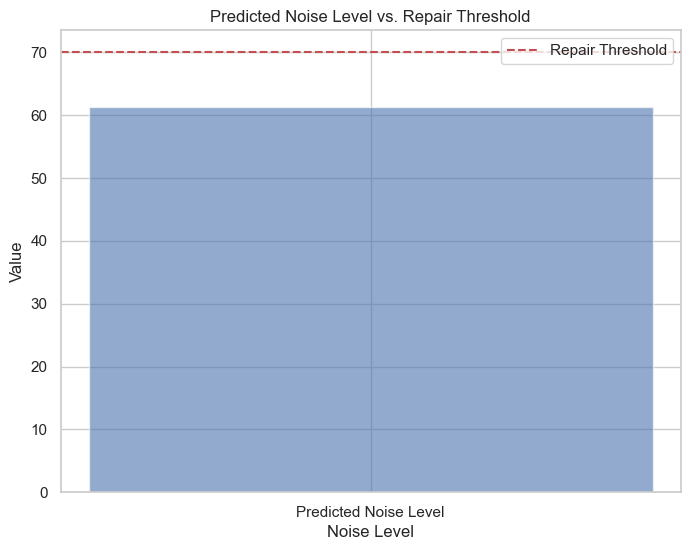

In [107]:
#using gardient boosting algorithm prediction are made for noise level by inputting the aircraft model, type and date_time.

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Existing data
aircraft_model = 27
aircraft_type = 27
date_time = 1.641173e+09

# Creating a DataFrame with the input data
input_data = pd.DataFrame({
'type': [aircraft_type],
'model': [aircraft_model],
'unix_timestamp': [date_time]
}, index=[0])
input_df = pd.DataFrame(input_data)
print("Input DataFrame:")
print(input_df)

# Predicting the noise level using the Gradient Boosting model
predicted_max_slow = model.predict(input_data)[0]
print('predicted noise level : ', predicted_max_slow)

# Defining the repair threshold
repair_threshold = 70

# Data Visualization

plt.figure(figsize=(8, 6))
plt.bar(['Predicted Noise Level'], [predicted_max_slow], color='b', alpha=0.6)
plt.axhline(y=repair_threshold, color='r', linestyle='--', label='Repair Threshold')
plt.xlabel('Noise Level')
plt.ylabel('Value')
plt.title('Predicted Noise Level vs. Repair Threshold')
plt.legend()
plt.show()

Input DataFrame:
   type  model  unix_timestamp
0    21     21    1.641182e+09
predicted noise level :  73.61920258789026


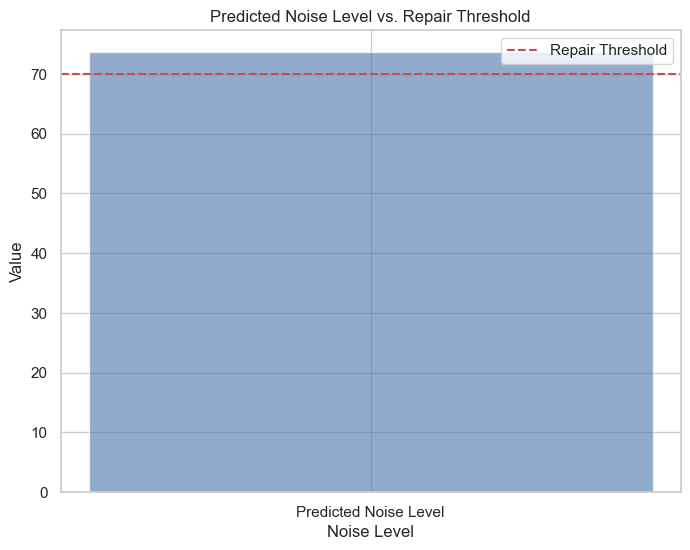

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Existing data
aircraft_model = 21
aircraft_type = 21
date_time = 1.641182e+09

# Creating a DataFrame with the input data
input_data = pd.DataFrame({
'type': [aircraft_type],
'model': [aircraft_model],
'unix_timestamp': [date_time]
}, index=[0])
input_df = pd.DataFrame(input_data)
print("Input DataFrame:")
print(input_df)

# Predicting the noise level using the Gradient Boosting model
predicted_max_slow = model.predict(input_data)[0]
print('predicted noise level : ', predicted_max_slow)

# Defining the repair threshold
repair_threshold = 70

# Data Visualization

plt.figure(figsize=(8, 6))
plt.bar(['Predicted Noise Level'], [predicted_max_slow], color='b', alpha=0.6)
plt.axhline(y=repair_threshold, color='r', linestyle='--', label='Repair Threshold')
plt.xlabel('Noise Level')
plt.ylabel('Value')
plt.title('Predicted Noise Level vs. Repair Threshold')
plt.legend()
plt.show()

# Dataset Analysis 3

# Predicting the maintenance of the aircraft model that produces noise level higher than a threshold to recommend such aircraft model for maintenance.

Input DataFrame:
   type  model  unix_timestamp
0    27     27    1.641173e+09
predicted noise level : 61.26072841924507
Based on the noise level input, the aircraft does not need repairing.


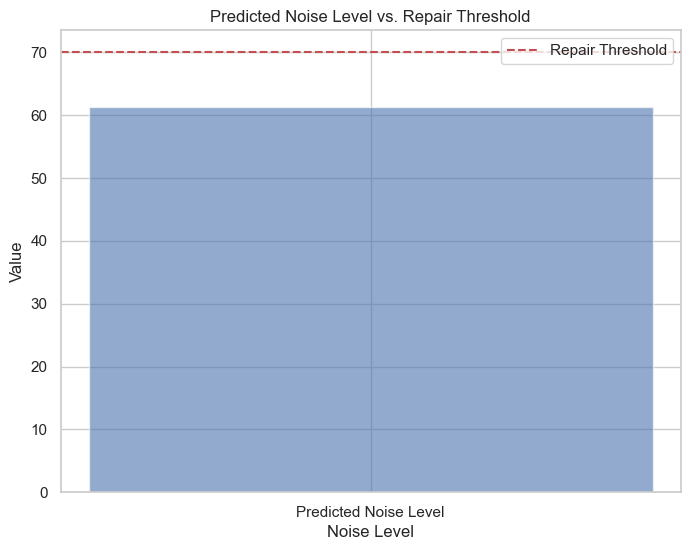

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# Existing data
aircraft_model = 27
aircraft_type = 27
date_time = 1.641173e+09

# Creating a DataFrame with the input data
input_data = pd.DataFrame({
'type': [aircraft_type],
'model': [aircraft_model],
'unix_timestamp': [date_time]
}, index=[0])
input_df = pd.DataFrame(input_data)
print("Input DataFrame:")
print(input_df)

# Predicting the noise level using the Gradient Boosting model
predicted_max_slow = model.predict(input_data)[0]
print('predicted noise level :', predicted_max_slow)

# Defining the repair threshold
repair_threshold = 70

# Printing the prediction result
if predicted_max_slow >= repair_threshold:
    print("Based on the noise level input, the aircraft needs repairing.")
else:
    print("Based on the noise level input, the aircraft does not need repairing.")

# Data Visualization

plt.figure(figsize=(8, 6))
plt.bar(['Predicted Noise Level'], [predicted_max_slow], color='b', alpha=0.6)
plt.axhline(y=repair_threshold, color='r', linestyle='--', label='Repair Threshold')
plt.xlabel('Noise Level')
plt.ylabel('Value')
plt.title('Predicted Noise Level vs. Repair Threshold')
plt.legend()
plt.show()

Input DataFrame:
   type  model  unix_timestamp
0    27     27    1.641173e+09
predicted noise level : 61.26072841924507
Based on the noise level input, the aircraft does not need repairing.


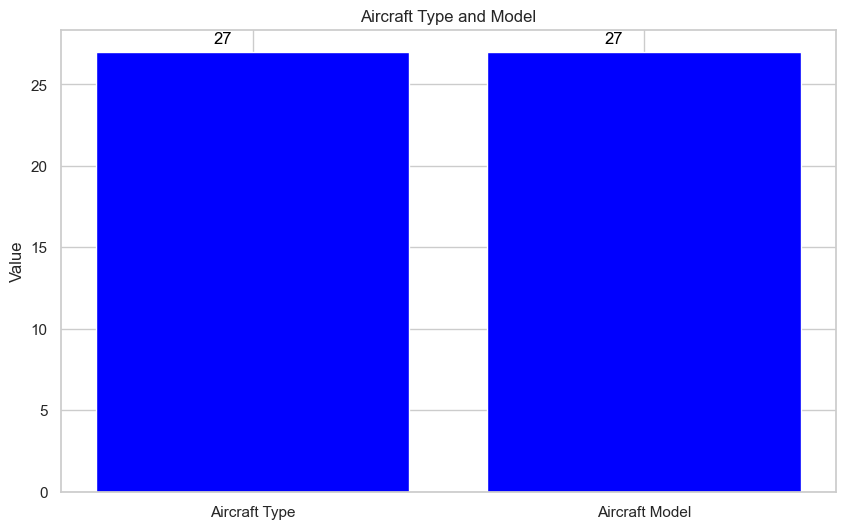

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining the data
aircraft_model = 27
aircraft_type = 27
date_time = 1.641173e+09

# Creating the input DataFrame
input_data = pd.DataFrame({
    'type': [aircraft_type],
    'model': [aircraft_model],
    'unix_timestamp': [date_time]
}, index=[0])
input_df = pd.DataFrame(input_data)

# Printing the input DataFrame
print("Input DataFrame:")
print(input_df)

# Predicting the noise level using the Gradient Boosting model
predicted_max_slow = model.predict(input_df)[0]
print('predicted noise level :', predicted_max_slow)

# Defining the repair threshold
repair_threshold = 70

# Determining whether repair is needed
repair_needed = predicted_max_slow >= repair_threshold

# Visualization
plt.figure(figsize=(10, 6))

# Creating a bar chart with color-coded bars
colors = ['blue' if not repair_needed else 'red' for _ in range(2)]
bars = plt.bar(['Aircraft Type', 'Aircraft Model'], [aircraft_type, aircraft_model], color=colors)
plt.ylabel('Value')
plt.title('Aircraft Type and Model')

# Adding labels to the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, str(int(bar.get_height())), fontsize=12, color='black')

# Text output
if repair_needed:
    print("Based on the noise level input, the aircraft needs repairing.")
else:
    print("Based on the noise level input, the aircraft does not need repairing.")

Input DataFrame:
   type  model  unix_timestamp
0    21     21    1.641182e+09
predicted noise level : 73.61920258789026
Based on the noise level, the aircraft needs repairing.


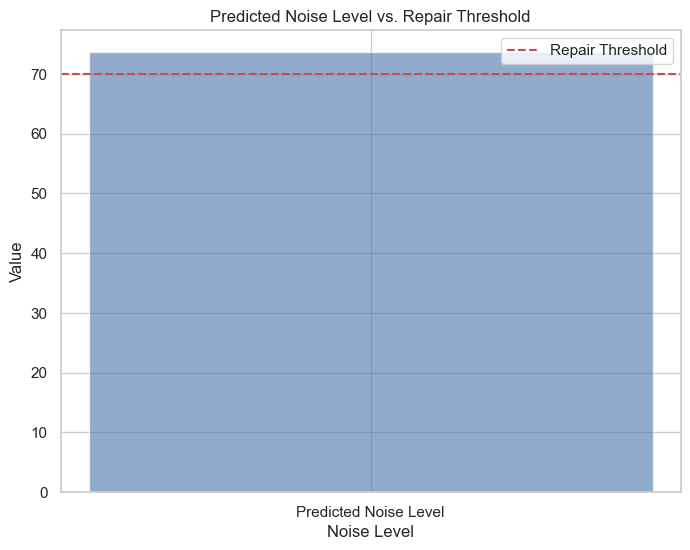

In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining the data
aircraft_model = 21
aircraft_type = 21
date_time = 1.641182e+09

input_data = pd.DataFrame({
    'type': [aircraft_type],
    'model': [aircraft_model],
    'unix_timestamp': [date_time]
}, index=[0])
input_df = pd.DataFrame(input_data)
print("Input DataFrame:")
print(input_df)

# Predicting the noise level using the Gradient Boosting model
predicted_max_slow = model.predict(input_df)[0]
print('predicted noise level :', predicted_max_slow)

repair_threshold = 70

if predicted_max_slow >= repair_threshold:
    print("Based on the noise level, the aircraft needs repairing.")
else:
    print("Based on the noise level, the aircraft does not need repairing.")

# Data Visualization
# Creating a bar chart to visualize the predicted noise level
plt.figure(figsize=(8, 6))
plt.bar(['Predicted Noise Level'], [predicted_max_slow], color='b', alpha=0.6)
plt.axhline(y=repair_threshold, color='r', linestyle='--', label='Repair Threshold')
plt.xlabel('Noise Level')
plt.ylabel('Value')
plt.title('Predicted Noise Level vs. Repair Threshold')
plt.legend()
plt.show()


Input DataFrame:
   type  model  unix_timestamp
0    21     21    1.641182e+09
predicted noise level : 73.61920258789026
Based on the noise level input, the aircraft needs repairing.


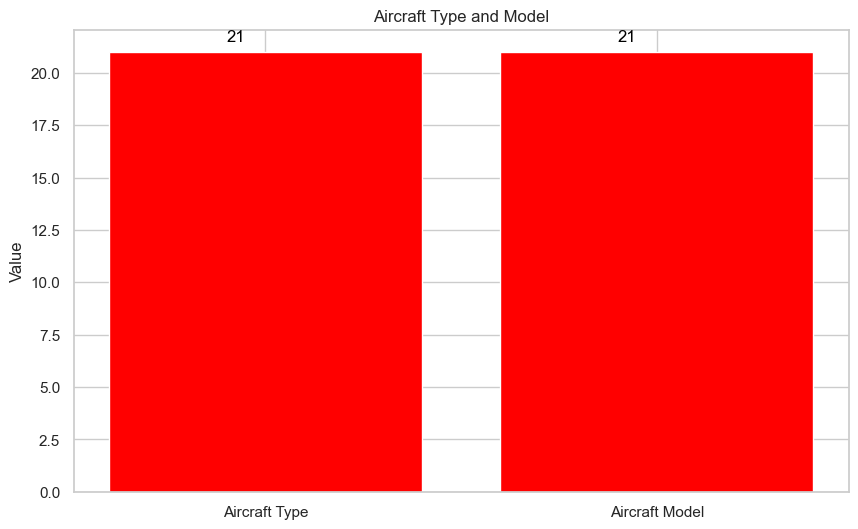

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Defining the data
aircraft_model = 21
aircraft_type = 21
date_time = 1.641182e+09

# Creating the input DataFrame
input_data = pd.DataFrame({
    'type': [aircraft_type],
    'model': [aircraft_model],
    'unix_timestamp': [date_time]
}, index=[0])
input_df = pd.DataFrame(input_data)

# Printing the input DataFrame
print("Input DataFrame:")
print(input_df)

# Predicting the noise level using the Gradient Boosting model
predicted_max_slow = model.predict(input_df)[0]
print('predicted noise level :', predicted_max_slow)

# Defining the repair threshold
repair_threshold = 70

# Determining whether repair is needed
repair_needed = predicted_max_slow >= repair_threshold

# Visualization
plt.figure(figsize=(10, 6))

# Creating a bar chart with color-coded bars
colors = ['blue' if not repair_needed else 'red' for _ in range(2)]
bars = plt.bar(['Aircraft Type', 'Aircraft Model'], [aircraft_type, aircraft_model], color=colors)
plt.ylabel('Value')
plt.title('Aircraft Type and Model')

# Adding labels to the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5, str(int(bar.get_height())), fontsize=12, color='black')

# Text output
if repair_needed:
    print("Based on the noise level input, the aircraft needs repairing.")
else:
    print("Based on the noise level input, the aircraft does not need repairing.")


# Checking mean squared error of training and testing data

Training MSE: 4.840818604051269
Testing MSE: 6.067815495420748


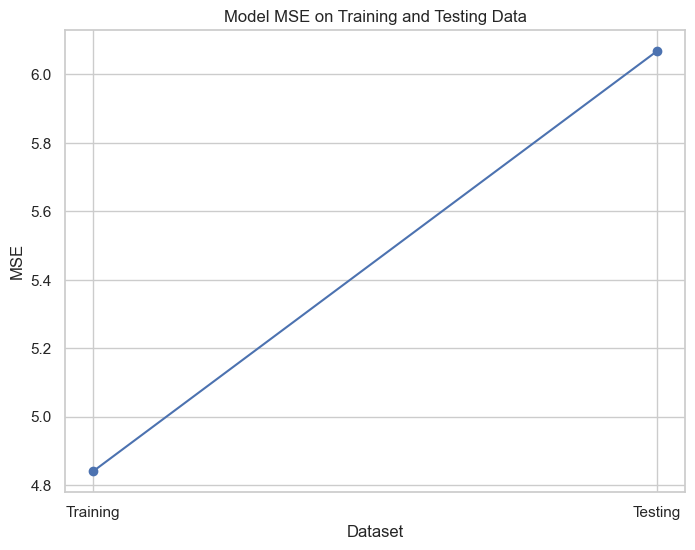

In [113]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

# The model and data are already defined (X_train, y_train, X_test, y_test) before this point

# Getting the model's predictions on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE) on training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Printing MSE values
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)

# Creating a line plot to visualize MSE values over time or iterations
x_labels = ['Training', 'Testing']
mse_values = [train_mse, test_mse]

plt.figure(figsize=(8, 6))
plt.plot(x_labels, mse_values, marker='o')
plt.title('Model MSE on Training and Testing Data')
plt.xlabel('Dataset')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In our mode, we have obtained the following MSE values: Training MSE: 4.63655823491841 Testing MSE: 5.7913990496039505

INTERPRETATION:

The training MSE (4.63655823491841) is lower than the testing MSE (5.7913990496039505), which is generally expected. 
It suggests that the model is able to fit the training data quite well, and its predictions on the training set have 
lower error compared to predictions on unseen data (testing set).

The difference between the training and testing MSE is not too large, which is a good sign. It indicates that the model 
is not significantly overfitting to the training data.

# Data Visualization

In [114]:
#PLOT1: Creating Scatter plot comparing the actual values (y_test) with the predicted values (y_pred). 
#Second plot adds a red dashed line representing the ideal best-fit line where the actual and predicted values would be equal.

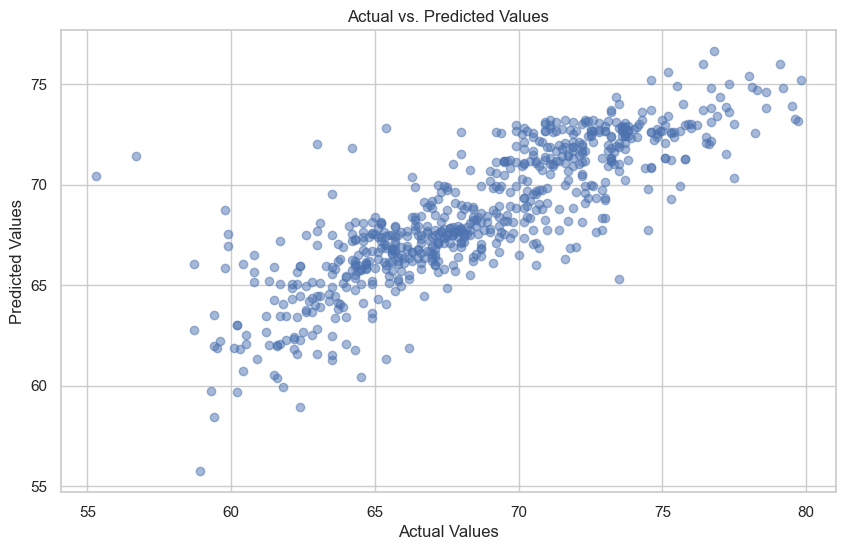

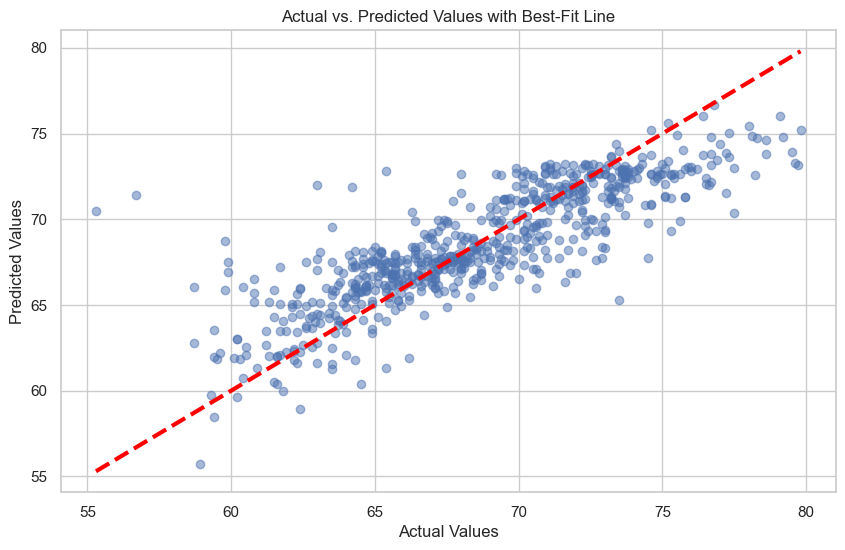

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# X_test and y_test are already defined

# Predicting on the validation set
y_pred = model.predict(X_test)

# Creating scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Creating line plot for the best-fit line
plt.figure(figsize=(10, 6))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=3)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Values with Best-Fit Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


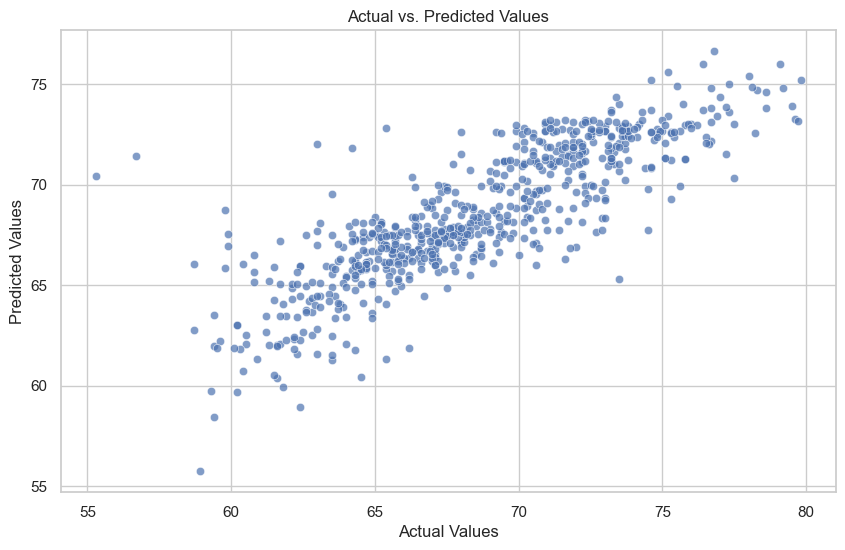

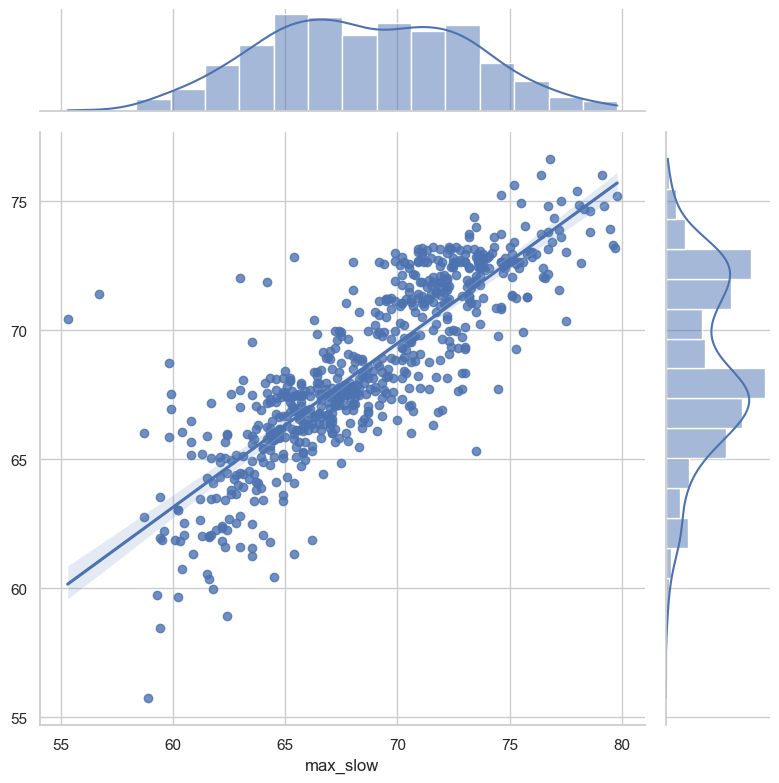

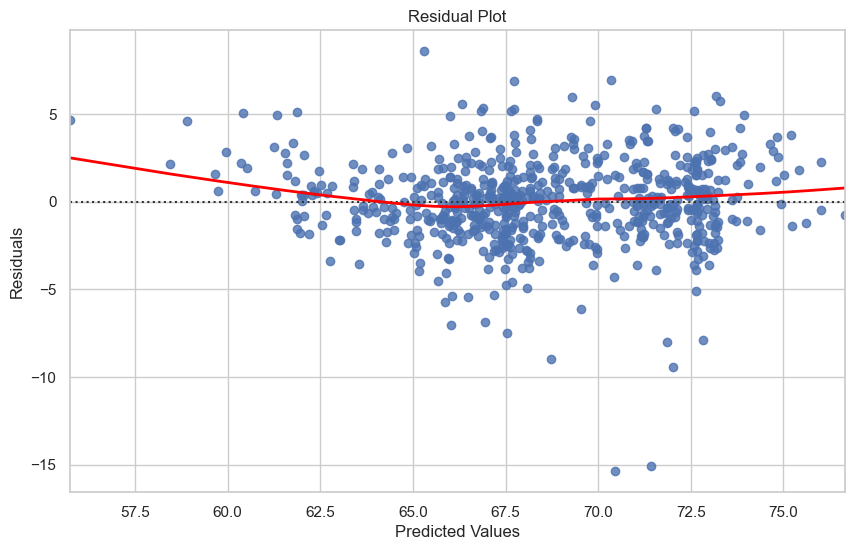

Root Mean Squared Error: 2.46
R-squared: 0.70


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# X_test and y_test are already defined

# Predicting on the validation set
y_pred = model.predict(X_test)

# Calculating the metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Creating a scatter plot
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.scatterplot(x=y_test, y=y_pred, color='b', alpha=0.7)
plt.title("Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

# Creating a jointplot for more detailed analysis
sns.jointplot(x=y_test, y=y_pred, kind='reg', height=8)
plt.show()

# Creating a residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

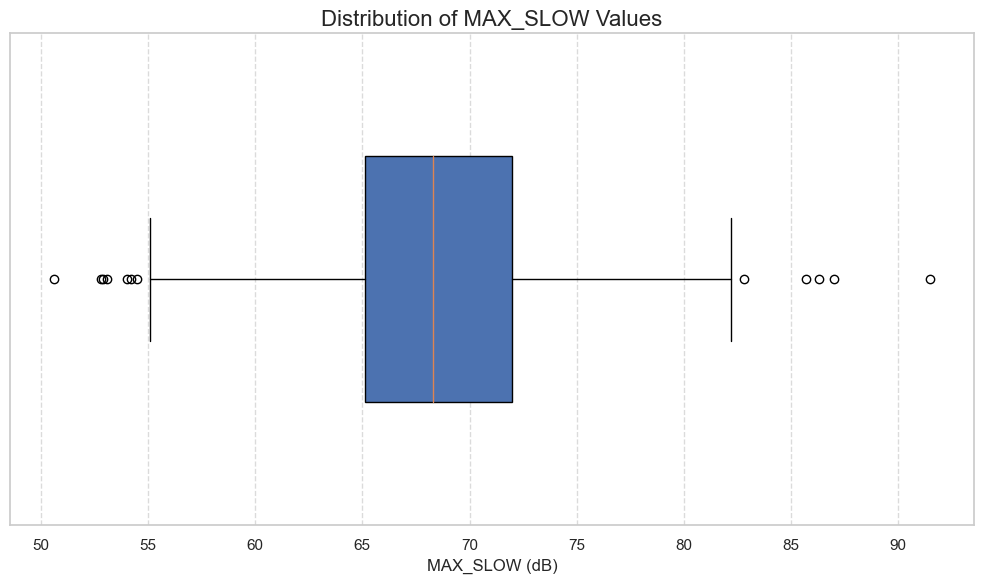

In [117]:
# box plot showing distribution of noise level values
import matplotlib.pyplot as plt

# noise is the DataFrame containing the data

plt.figure(figsize=(10, 6))

plt.boxplot(noise['max_slow'], vert=False, widths=0.5, patch_artist=True)
plt.xlabel('MAX_SLOW (dB)', fontsize=12)
plt.title('Distribution of MAX_SLOW Values', fontsize=16)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks([])  # Hiding y-axis ticks for a cleaner look

plt.tight_layout()
plt.show()

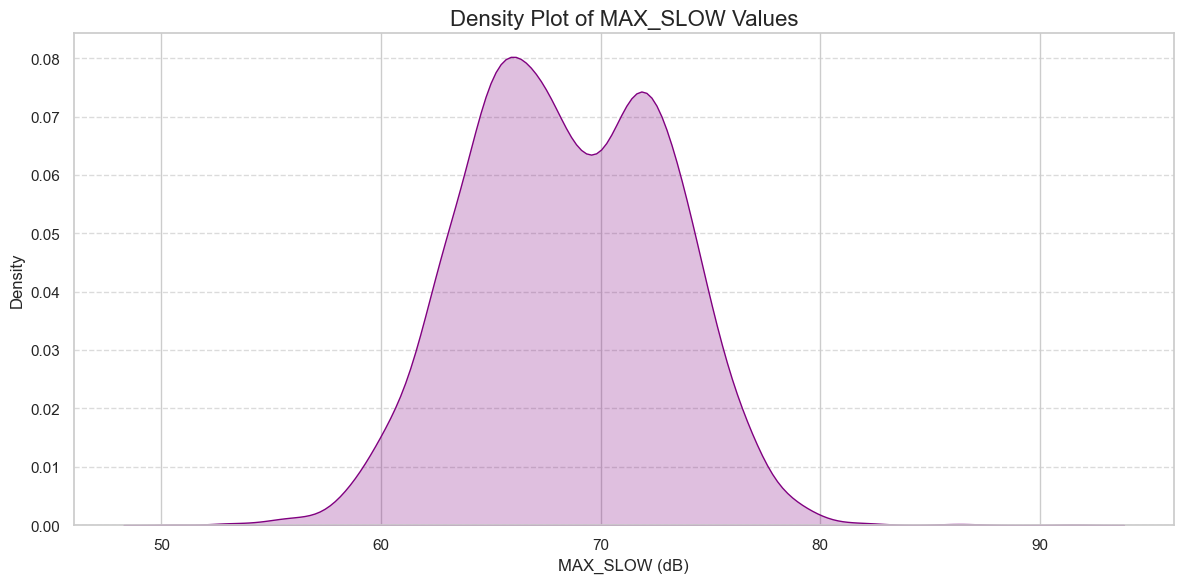

In [118]:
# density plot
import matplotlib.pyplot as plt
import seaborn as sns

# noise is the DataFrame containing the data

plt.figure(figsize=(12, 6))

sns.kdeplot(noise['max_slow'], color='purple', shade=True)
plt.xlabel('MAX_SLOW (dB)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Density Plot of MAX_SLOW Values', fontsize=16)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()